<a href="https://colab.research.google.com/github/woodzim/PA-DATA-MINING-KELOMPOK-3-B2/blob/main/Supervised_3_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KELOMPOK 3 B2
### Anggota Kelompok :


1.   Jamal - 2109116073
2.   Indra Maulana - 2109116074
3. Arya Bhima Andika - 2109116075
4. Kevin Sanjaya Lois - 2109116082



#Analisis IBM HR Analytics Employee Attrition & Performance



##A. Business Understanding

Analisis IBM HR Analytics Employee Attrition & Performance Menggunakan Metodologi CRISP-DM
1.	Determine Business Objective Tujuan bisnis dari IBM HR Analytics Employee Attrition & Performance adalah untuk mengidentifikasi faktor-faktor yang mempengaruhi tingkat pelepasan karyawan dan kinerja karyawan di perusahaan. Aplikasi ini bertujuan untuk memberikan wawasan kepada manajemen perusahaan sehingga mereka dapat mengambil tindakan yang tepat untuk meningkatkan retensi karyawan dan kinerja perusahaan.
2.	Access Situation Pelepasan karyawan dan penurunan kinerja dapat menyebabkan kerugian besar bagi perusahaan, termasuk biaya pelatihan karyawan baru, kehilangan keahlian dan pengalaman, dan pengaruh negatif terhadap citra perusahaan. Oleh karena itu, perusahaan membutuhkan informasi yang dapat membantu mereka mengidentifikasi faktor-faktor yang dapat mempengaruhi tingkat pelepasan karyawan dan kinerja karyawan.
3.	Determine Data Mining Goals Tujuan dari analisis data mining pada IBM HR Analytics Employee Attrition & Performance adalah untuk:

  - Menganalisis faktor-faktor yang mempengaruhi tingkat pelepasan karyawan dan kinerja karyawan
  -	Membangun model machine learning yang dapat memprediksi tingkat pelepasan karyawan dan kinerja karyawan
  - 	Memberikan rekomendasi tindakan yang dapat diambil oleh manajemen perusahaan untuk meningkatkan retensi karyawan dan kinerja perusahaan
4.	Produce Project Plan Proyek analisis IBM HR Analytics Employee Attrition & Performance 

##B. Data Understanding

1. Collect Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

df = pd.read_csv('https://raw.githubusercontent.com/woodzim/datmin/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

2. Describe Data

In [2]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Kolom-kolom tersebut mewakili fitur-fitur (features) dari sebuah dataset, di mana setiap baris mewakili satu data point (data point adalah kumpulan nilai dari semua fitur untuk satu entitas tertentu). Berikut adalah penjelasan dari setiap kolom pada dataset tersebut:
1.	Kolom "Age" - umur karyawan (tipe data: int64)
2.	Kolom "Attrition" - apakah karyawan keluar atau tidak dari perusahaan (tipe data: object)
3.	Kolom "BusinessTravel" - frekuensi karyawan melakukan perjalanan bisnis (tipe data: object)
4.	Kolom "DailyRate" - gaji harian karyawan (tipe data: int64)
5.	Kolom "Department" - departemen tempat karyawan bekerja (tipe data: object)
6.	Kolom "DistanceFromHome" - jarak antara rumah karyawan dengan kantor (tipe data: int64)
7.	Kolom "Education" - level pendidikan karyawan (tipe data: int64)
8.	Kolom "EducationField" - bidang pendidikan karyawan (tipe data: object)
9.	Kolom "EmployeeCount" - jumlah karyawan (tipe data: int64)
10.	Kolom "EmployeeNumber" - nomor identifikasi karyawan (tipe data: int64)
11.	Kolom "EnvironmentSatisfaction" - kepuasan karyawan terhadap lingkungan kerja (tipe data: int64)
12.	Kolom "Gender" - jenis kelamin karyawan (tipe data: object)
13.	Kolom "HourlyRate" - gaji per jam karyawan (tipe data: int64)
14.	Kolom "JobInvolvement" - tingkat keterlibatan karyawan terhadap pekerjaannya (tipe data: int64)
15.	Kolom "JobLevel" - level jabatan karyawan (tipe data: int64)
16.	Kolom "JobRole" - peran karyawan dalam perusahaan (tipe data: object)
17.	Kolom "JobSatisfaction" - kepuasan karyawan terhadap pekerjaannya (tipe data: int64)
18.	Kolom "MaritalStatus" - status perkawinan karyawan (tipe data: object)
19.	Kolom "MonthlyIncome" - gaji bulanan karyawan (tipe data: int64)
20.	Kolom "MonthlyRate" - jumlah gaji yang diterima karyawan setiap bulannya (tipe data: int64)
21.	Kolom "NumCompaniesWorked" - jumlah perusahaan tempat karyawan bekerja sebelumnya (tipe data: int64)
22.	Kolom "Over18" - apakah karyawan berusia di atas 18 tahun (tipe data: object)
23.	Kolom "OverTime" - apakah karyawan bekerja lembur atau tidak (tipe data: object)
24.	Kolom "PercentSalaryHike" - persentase kenaikan gaji karyawan dari waktu ke waktu (tipe data: int64)
25.	Kolom "PerformanceRating" - rating kinerja karyawan (tipe data: int64)
26.	Kolom "RelationshipSatisfaction" - kepuasan karyawan terhadap hubungan interpersonal di tempat kerja (tipe data: int64)
27.	Kolom "StandardHours" - jumlah jam kerja standar per minggu (tipe data: int64
28.	StockOptionLevel: Angka yang merepresentasikan level opsi saham yang dimiliki karyawan (skala 0-3).
29.	TotalWorkingYears: Angka yang merepresentasikan jumlah tahun kerja karyawan saat ini.
30.	TrainingTimesLastYear: Angka yang merepresentasikan berapa kali karyawan dilatih selama tahun terakhir.
31.	WorkLifeBalance: Angka yang merepresentasikan seberapa seimbang karyawan merasa antara pekerjaan dan kehidupan pribadi mereka (skala 1-4).
32.	YearsAtCompany: Angka yang merepresentasikan jumlah tahun karyawan telah bekerja di perusahaan saat ini.
33.	YearsInCurrentRole: Angka yang merepresentasikan jumlah tahun karyawan telah bekerja dalam peran saat ini.
34.	YearsSinceLastPromotion: Angka yang merepresentasikan jumlah tahun sejak karyawan terakhir kali dipromosikan.
35.	YearsWithCurrManager: Angka yang merepresentasikan jumlah tahun karyawan telah bekerja dengan manajer saat ini.



In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Terdapat 1470 baris dan 35 kolom pada data ini
df.shape

(1470, 35)

In [7]:
# Didalam dataset ini terdapat 1233 tidak keluar dari perusahaan dan 237 keluar dari perusahaan
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

####Explore Data

In [8]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


#####Univariate
Visualisasi yang hanya akan melihat distribusi dari tiap - tiap kolom saja

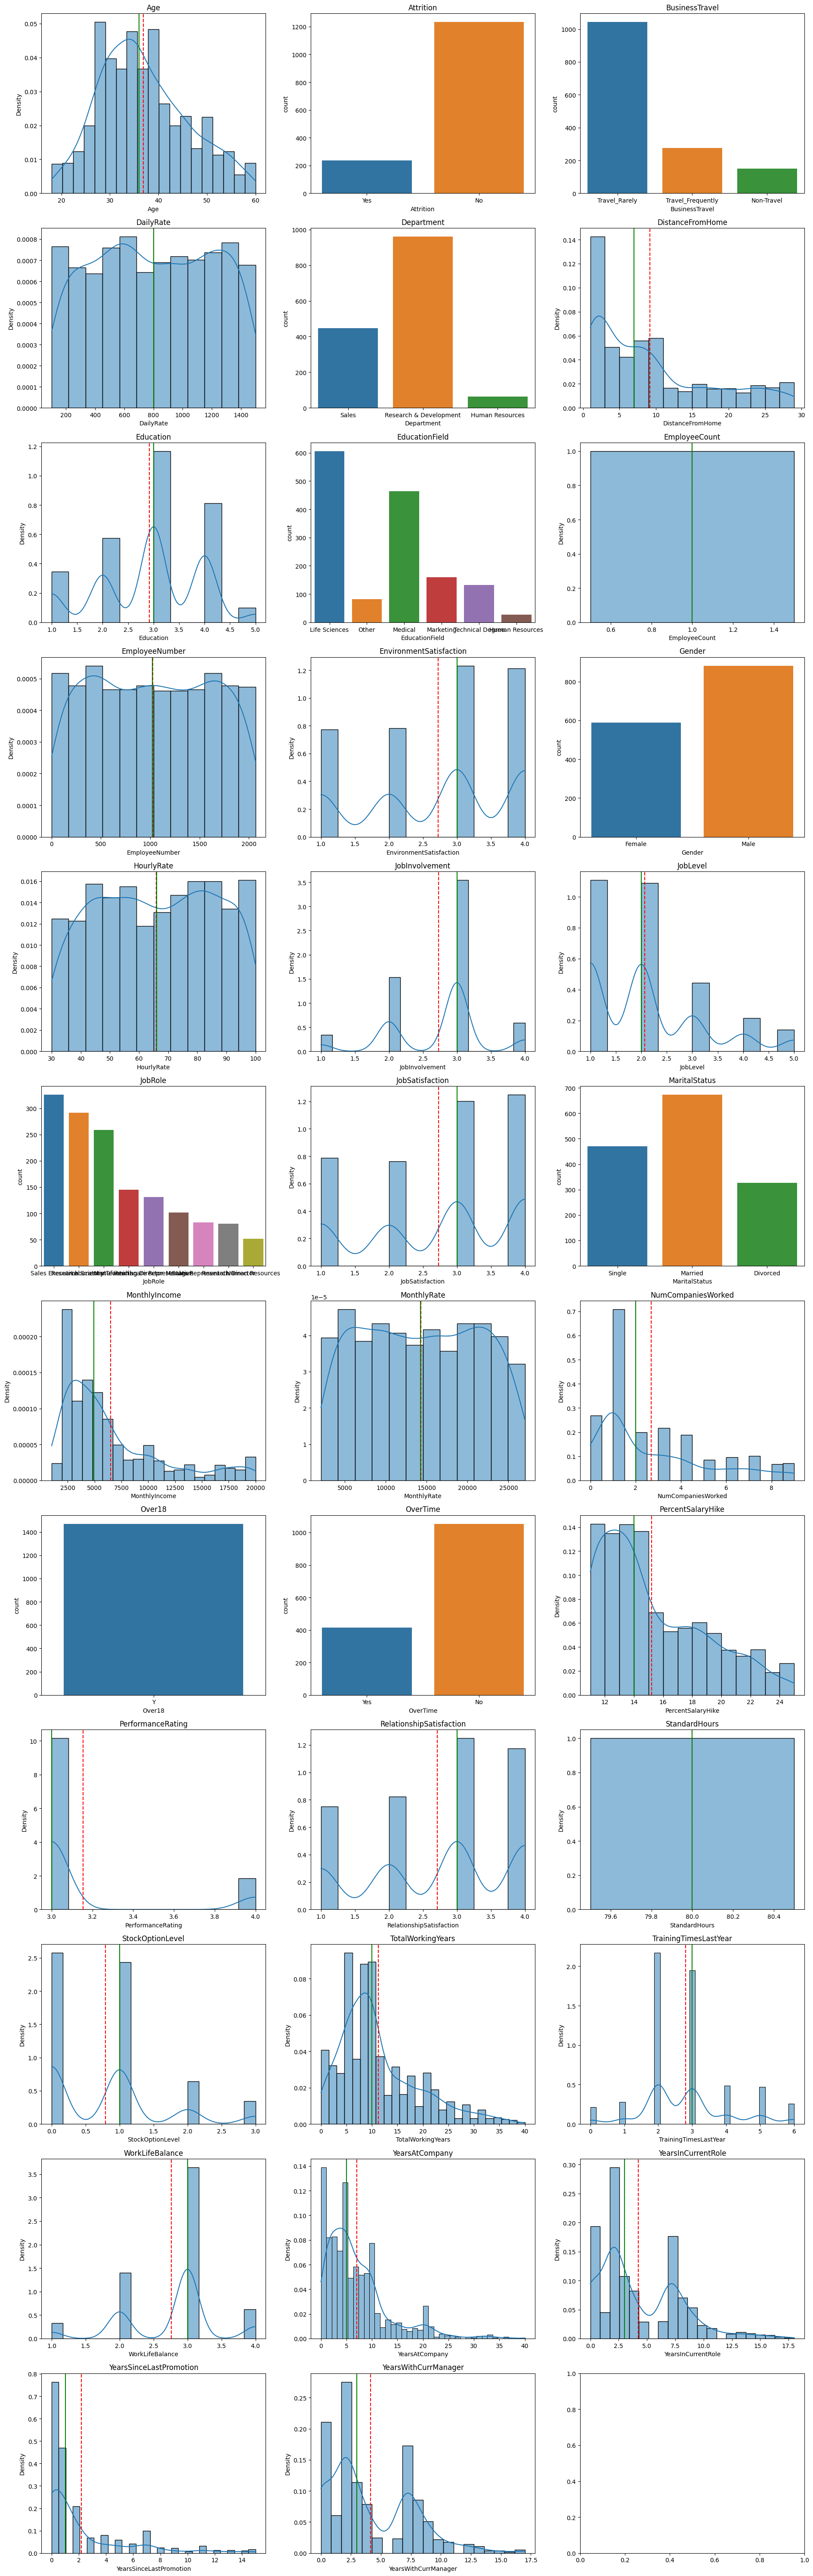

In [9]:
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool', 'object'])

num_rows = int((df_numeric.shape[1] + 2) / 3)  # Update for 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(19, 5 * num_rows))  # Update for 3 columns
axes = axes.ravel()

for i, col in enumerate(df_numeric.columns):
    if df_numeric[col].dtype in ['float64', 'int64']:
        sns.histplot(data=df_numeric, x=col, kde=True, stat='density', ax=axes[i])
        mean = df_numeric[col].mean()
        median = df_numeric[col].median()
        axes[i].axvline(mean, color='r', linestyle='--', label='Mean')
        axes[i].axvline(median, color='g', linestyle='-', label='Median')
    elif df_numeric[col].dtype == 'object':
        sns.countplot(data=df_numeric, x=col, ax=axes[i])
    elif df_numeric[col].dtype == 'bool':
        sns.countplot(data=df_numeric, x=col, ax=axes[i])
        axes[i].set_xticklabels(['False', 'True'])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

<ipython-input-10-c90b82342b88>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


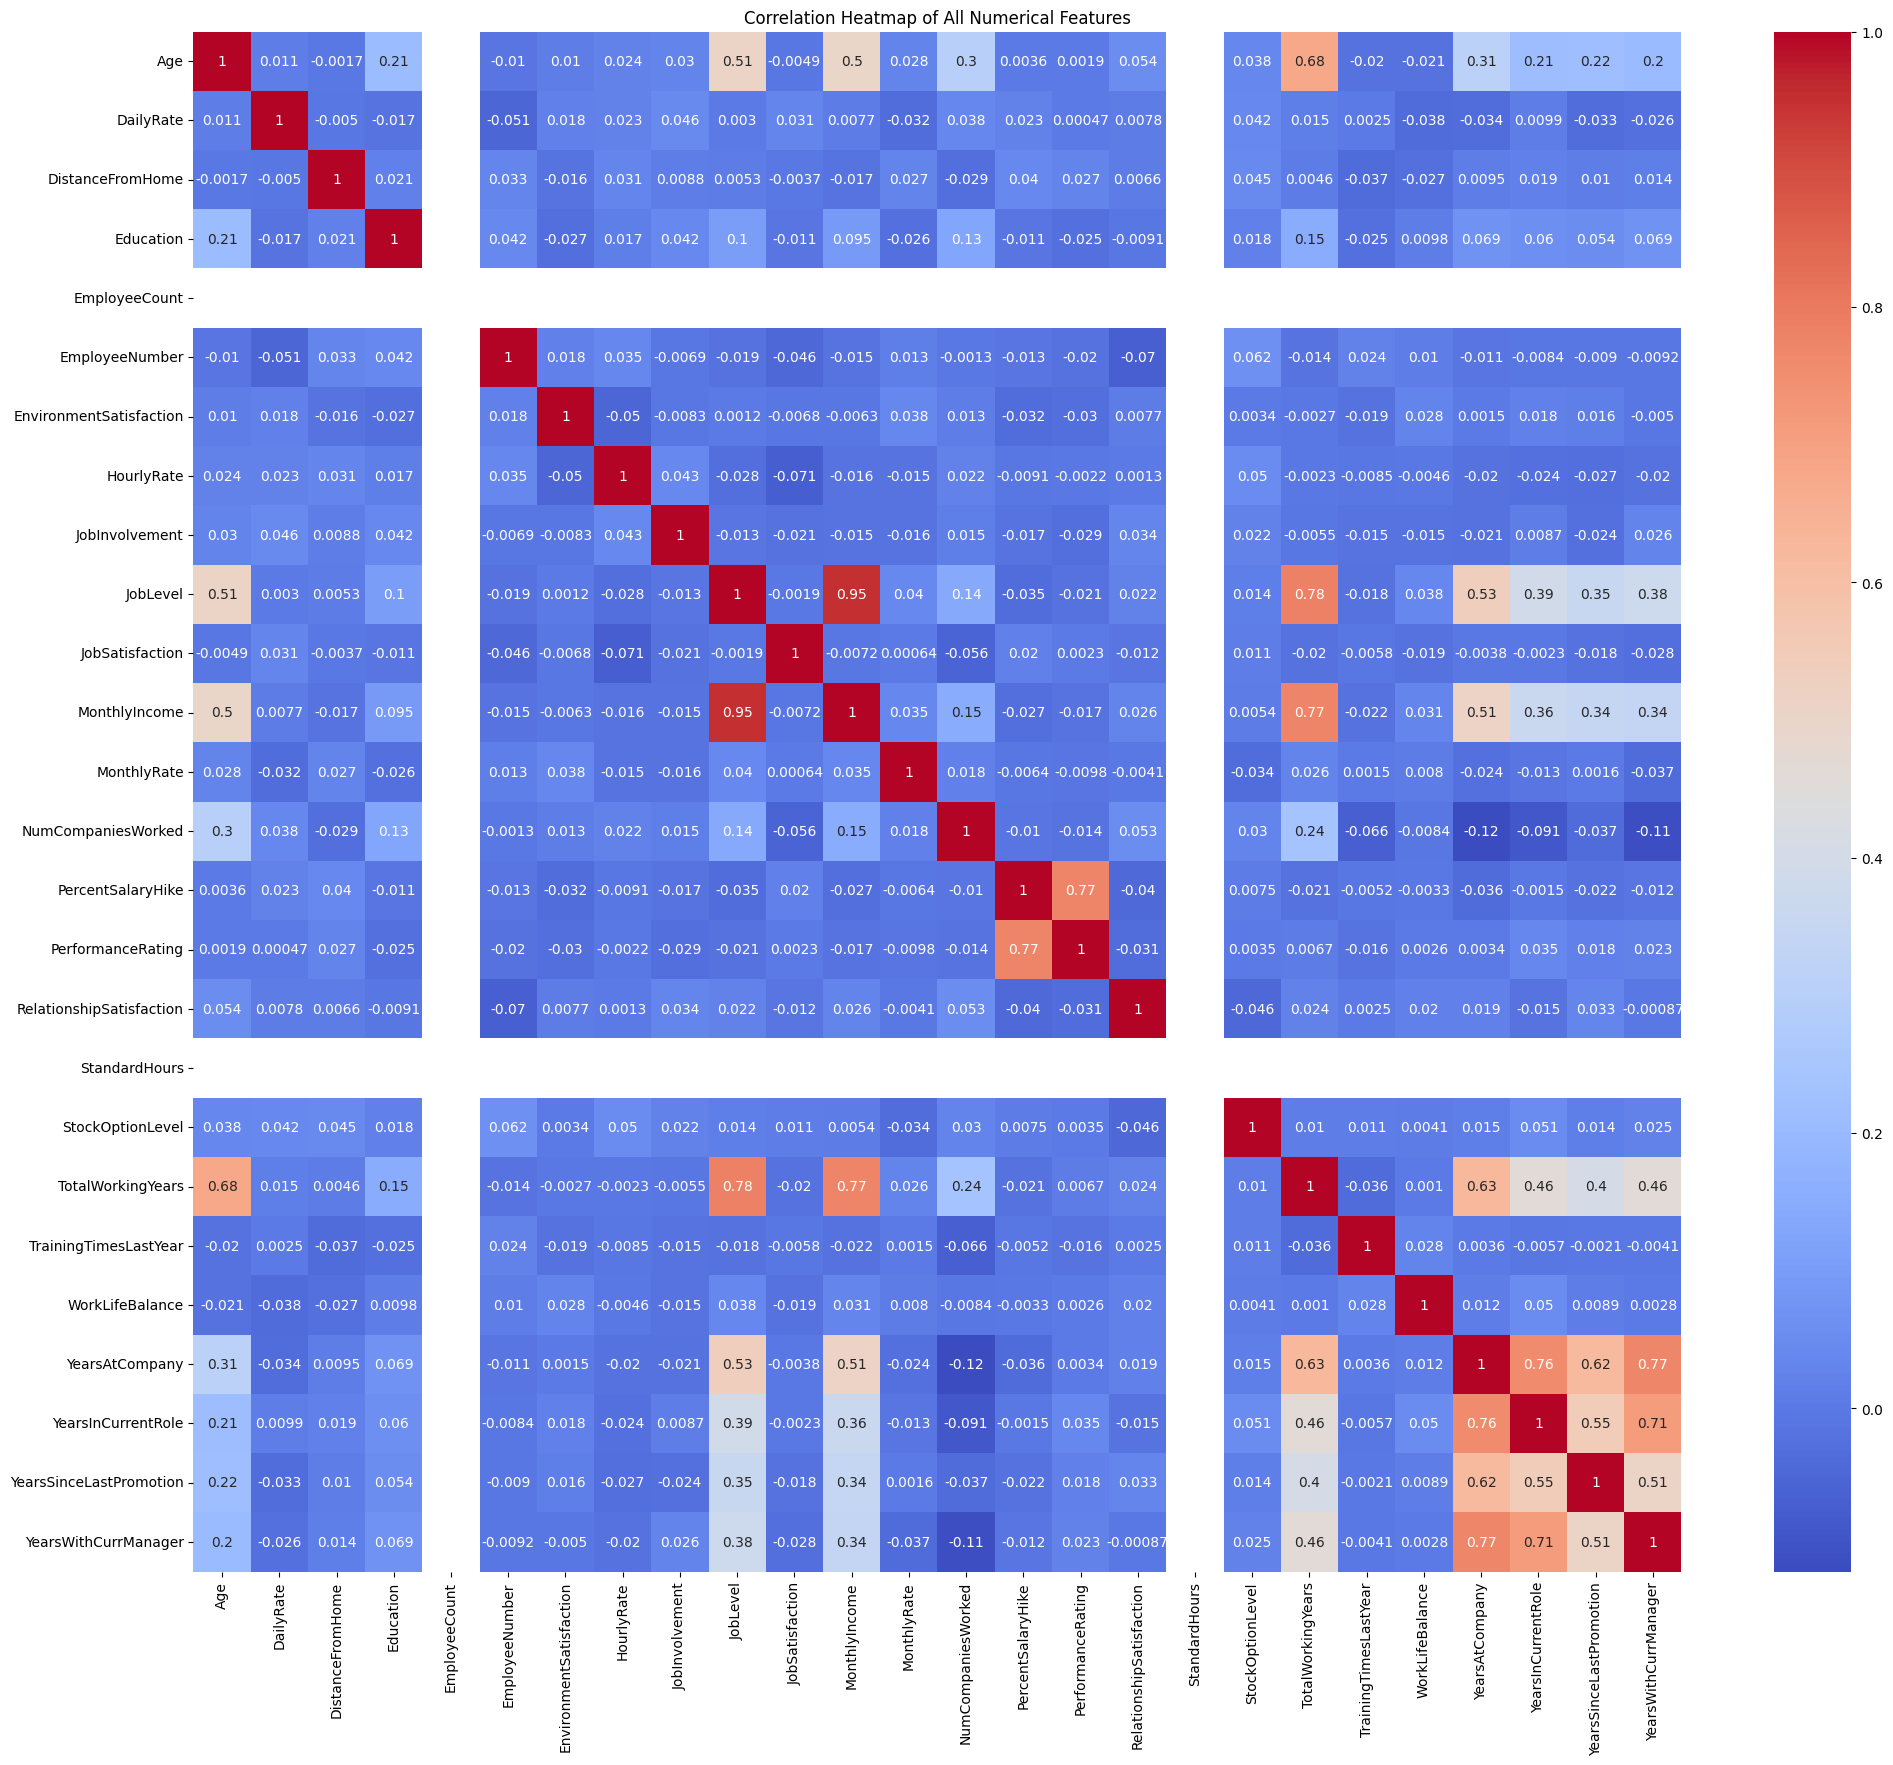

In [10]:
#analysis the correlation between the target variable and the x variables
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(24,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of All Numerical Features")

plt.show()

#####Bivariate
Visualisasi yang menampilkan distribusi antara dua variabel

No    0.84
Yes   0.16
Name: Attrition, dtype: float64

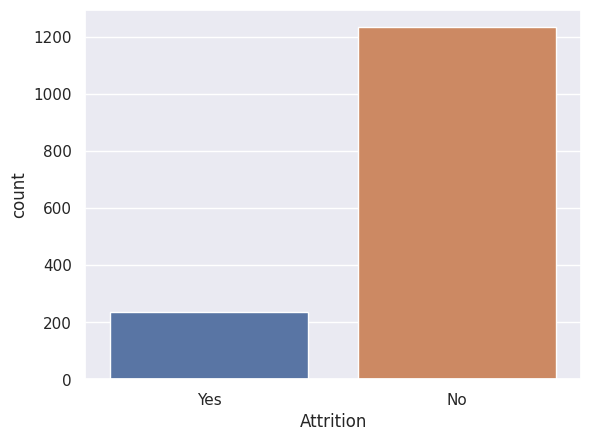

In [11]:
#visulize target variable
import seaborn as sns
sns.set(style = "darkgrid")
sns.countplot(x = "Attrition",data=df)
df.Attrition.value_counts(normalize=True)

In [12]:
import plotly.express as px
attDataBasedonAge=df.groupby(['Age','Attrition']).apply(lambda x:x['Age'].count()).reset_index(name='Counts')
px.line(attDataBasedonAge,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

<Axes: xlabel='BusinessTravel', ylabel='count'>

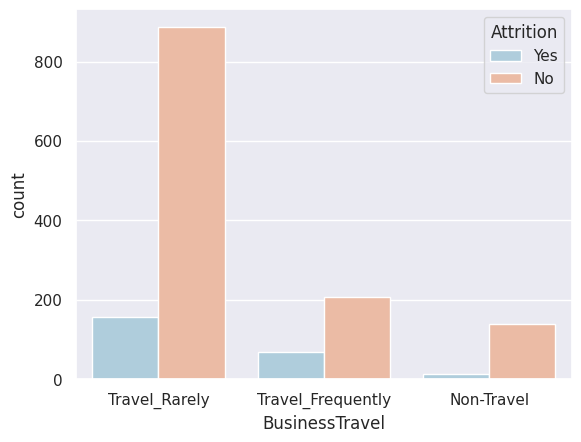

In [13]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='RdBu_r')

####Verify Data Quality
Dilakukan pengecekan kualitas data untuk memastikan bahwa data yang digunakan dalam proses pemodelan sudah teruji dan valid, sehingga menghasilkan pemodelan yang berkualitas.

In [14]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
df.duplicated().sum()

0

In [16]:
# List untuk menyimpan hasil
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.00
DailyRate,0.00
DistanceFromHome,0.00
Education,0.00
EmployeeCount,0.00
EmployeeNumber,0.00
EnvironmentSatisfaction,0.00
HourlyRate,0.00
JobInvolvement,0.00
JobLevel,0.00


In [17]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

##C. Data Preperation



####1. Select Data

In [18]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


####2. Cleaning Data

Meliputi proses penghapusan data kosong, penghapusan outliers berdasarkan syarat tertentu, dan penghapusan data yang terduplikat agar proses analisis yang dilakukan dapat memberikan hasil yang optimal

In [19]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
# List untuk menyimpan hasil
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.00
DailyRate,0.00
DistanceFromHome,0.00
Education,0.00
EmployeeCount,0.00
EmployeeNumber,0.00
EnvironmentSatisfaction,0.00
HourlyRate,0.00
JobInvolvement,0.00
JobLevel,0.00


In [21]:
cols = df.select_dtypes(include=['float64', 'int64'])

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    if percent_outliers < 5:
      df = df[~((df[col] > upper_bound) | (df[col] < lower_bound))]
    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers_after = (len(outliers_after)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.00
DailyRate,0.00
DistanceFromHome,0.00
Education,0.00
EmployeeCount,0.00
EmployeeNumber,0.00
EnvironmentSatisfaction,0.00
HourlyRate,0.00
JobInvolvement,0.00
JobLevel,0.00


In [22]:
print('Jumlah data yang terduplikat :',df.duplicated().sum())

Jumlah data yang terduplikat : 0


In [23]:
df_clean = df

####3. Construct Data
Dilakukan untuk mengubah data menjadi bentuk baru yang lebih mudah digunakan

In [24]:
#Transforming
df_clean['Attrition'] = df_clean['Attrition'].map({"Yes":1,"No":0})
df_clean['OverTime'] = df_clean['OverTime'].map({'Yes': 1, 'No': 0})
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female': 0})
business_travel_map = {'Non-Travel':0, 'Travel_Rarely': 1, 'Travel_Frequently':2}
df_clean['BusinessTravelFreqNo']=df_clean["BusinessTravel"].map(business_travel_map)
df_clean = df_clean.drop(columns='BusinessTravel')

#Extracting
df_clean['AverageYearJobChange'] = np.where(df_clean['NumCompaniesWorked'] == 0, 0, df_clean['TotalWorkingYears']/df_clean['NumCompaniesWorked'])
df_clean['Married'] = np.where(df_clean['MaritalStatus'] == "Married", 1, 0)
df_clean['ManagerOrAbove'] = np.where((df_clean['JobRole'] == 'Manager') | (df_clean['JobRole'] == 'Research Director')|(df_clean['JobRole'] == 'Manufacturing Director') , 1, 0)

<ipython-input-24-6d4cfa5a39f7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-6d4cfa5a39f7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-6d4cfa5a39f7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-6d4cfa5

####Reduction Data
Dilakukan untuk menghilangkan atau menghapus kolom yang tidak keberadaannya tidak terlalu berpengaruh terhadap analisis yang akan dilakukan

In [25]:
df_construct = df_clean.drop(columns=['EmployeeNumber','EmployeeCount', 'Over18','StandardHours', 'JobSatisfaction','MaritalStatus','NumCompaniesWorked','PercentSalaryHike','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','AverageYearJobChange'],axis=1)
df_construct = df_construct.drop(columns=["DailyRate","HourlyRate","MonthlyRate"],axis=1)

####Format Data
Data diubah formatnya menggunakan teknik one hot encoding untuk mewakili setiap nilai unik dalam variabel kategorikal dengan satu kolom biner. Nilai-nilai tersebut kemudian diisi dengan 0 atau 1 tergantung pada kehadiran nilai tersebut pada sampel tertentu.

In [26]:
df_encode = pd.get_dummies(df_construct)

####Splitting Data
Dilakukan untuk membagi data menjadi dua bagian, yaitu data latih dan data uji. Data latih digunakan untuk melatih model atau algoritma yang akan digunakan, sedangkan data uji digunakan untuk mengevaluasi performa model yang telah dilatih pada data latih. 

In [27]:
from sklearn.model_selection import train_test_split
x = df_encode.drop('Attrition',axis=1)
y = df_encode['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

####Cross Validation
Validasi silang dilakukan untuk mengevaluasi kinerja model secara objektif dan mencegah overfitting atau underfitting. Pada kasus ini, teknik validasi silang digunakan untuk menentukan nilai k yang optimal dalam membangun model yang lebih akurat.

In [28]:
# definisikan model KNN
clf = KNeighborsClassifier()

# definisikan hyperparameter yang ingin diuji
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# latih model dengan GridSearchCV
grid_search.fit(x_train, y_train)

# tampilkan parameter terbaik
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])

# tampilkan skor validasi terbaik
print("Skor validasinya:", grid_search.best_score_)


Nilai k terbaik: 9
Skor validasinya: 0.8215962441314554


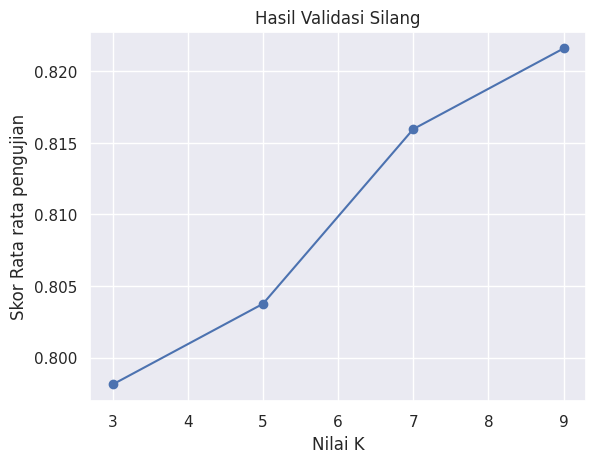

In [29]:
# ambil nilai skor validasi dari grid search
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# plot hasil dari grid search
plt.errorbar(
    [params[i]['n_neighbors'] for i in range(len(params))],
    mean_scores,
    fmt='o-'
)
plt.xlabel('Nilai K')
plt.ylabel('Skor Rata rata pengujian')
plt.title('Hasil Validasi Silang')
plt.grid(True)
plt.show()

Visualisasi di atas menunjukkan hasil dari validasi silang yang telah dilakukan. Dapat dilihat bahwa titik tertinggi pada grafik terletak pada nilai k yang sama dengan 3

##Modelling

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
import numpy as np

####Pre-Processing
Pada analisis ini akan dilakukan penskalaan, yaitu proses transformasi data numerik sehingga skala nilainya menjadi sama atau seimbang. Pensklaan berguna untuk meningkatkan kinerja model dan memastikan bahwa variabel yang mempunyai skala yang lebih besar tidak mendominasi variabel lainnya dalam proses pembelajaran model.

In [31]:
scaler = StandardScaler()

# fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# convert the scaled training data to a Pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# transform the testing data using the fitted scaler
x_test_scaled = scaler.transform(x_test)

# convert the scaled testing data to a Pandas DataFrame
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

######Naive Bayes
Algoritma ini merupakan metode klasifikasi yang menggunakan probabilitas dan asumsi bahwa setiap fitur input adalah independen satu sama lain, sehingga disebut "naive". Dengan memanfaatkan probabilitas, algoritma ini dapat menghasilkan prediksi berdasarkan faktor-faktor yang mempengaruhi secara efisien.

In [32]:
class GaussianNB:
    # Constructor
    def __init__(self):
        self.sigmas = dict()
        self.dispersions = dict()
        self.probs = dict()
        self.index = None
        self.targets = None
        self.columns = None
    
    def fit(self, x, y):
        # Convert x to DataFrame
        x = pd.DataFrame(x, columns=self.columns)

        # Store the original index of x
        self.index = x.index

        # Preparing sigma / dispersion dictionaries for numeric columns
        self.sigmas = {}
        self.dispersions = {}
        for column in x.select_dtypes(include=[np.number]):
            self.sigmas[column] = {}
            self.dispersions[column] = {}
            for target in y.unique():
                sample = np.array(x[y.values == target][column])
                self.sigmas[column][target] = sample.std()
                self.dispersions[column][target] = sample.mean()
                self.probs[column] = len(sample) / len(x)

        self.targets = y.unique()
        self.columns = x.columns

    # Predict method
    def predict(self, X):
        predicts = list()
        for row in X.to_numpy():
            target_prob_dict = dict()
            for target in self.targets:
                for x, column in zip(row, self.columns):
                    x = float(x)
                    sigma = self.sigmas[column][target]
                    dispersion = self.dispersions[column][target]
                    prob = self.probs[column]
                    target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob

                    if target not in target_prob_dict:
                        target_prob_dict[target] = target_prob
                    else:
                        target_prob_dict[target] *= target_prob
                        
            # Get the predicted class based on the highest probability
            predicted_class = max(target_prob_dict, key=target_prob_dict.get)
            predicts.append(predicted_class)
        
        return predicts
    
    def print(self):
        print("Sigmas:")
        for column in self.sigmas:
            print(f"\t{self.columns[column]}")

In [33]:
# create a Gaussian Naive Bayes object
gnb = GaussianNB()

# train the model on the scaled training data
gnb.fit(x_train_scaled_df, y_train)

# make predictions on the scaled testing data
gnb_pred = gnb.predict(x_test_scaled_df)


#####K-Nearest Neighbor

In [34]:
class KNeighbors:
    def __init__(self, n_neighbors=None):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        
    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
        for i, x_test in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
            indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_classes = self.y_train[indices]
            y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
        return y_pred

In [35]:
# Inisialisasi model KNN dengan k=9
knn = KNeighbors(n_neighbors=9)

# Train model menggunakan data train
knn.fit(x_train_scaled_df, y_train)

# Prediksi label pada data test
knn_pred = knn.predict(x_test_scaled_df)

#####C4.5 (Decission Tree Classifier)

In [36]:
# inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# train model pada data train
dtc.fit(x_train_scaled_df, y_train)

# evaluasi model pada data test
dtc_pred = dtc.predict(x_test_scaled_df)

##Evaluation
Evaluasi pada analisis ini akan dilakukan menggunakan confusion matrix. Confusion matrix merupakan sebuah matriks yang digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan nilai aktual dan prediksi dari suatu model. Terdapat empat nilai dalam confusion matrix, yaitu True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN). Dari nilai-nilai ini, kita dapat menghitung akurasi, presisi, dan recall. Akurasi merupakan rasio prediksi yang benar dari semua prediksi. Presisi merupakan rasio prediksi yang benar positif dari semua prediksi positif. Recall merupakan rasio prediksi yang benar positif dari semua kasus positif yang sebenarnya.

Apabila hasil dari akurasi, presisi, dan recall mendekati 1, maka akan semakin baik kinerja model yang digunakan

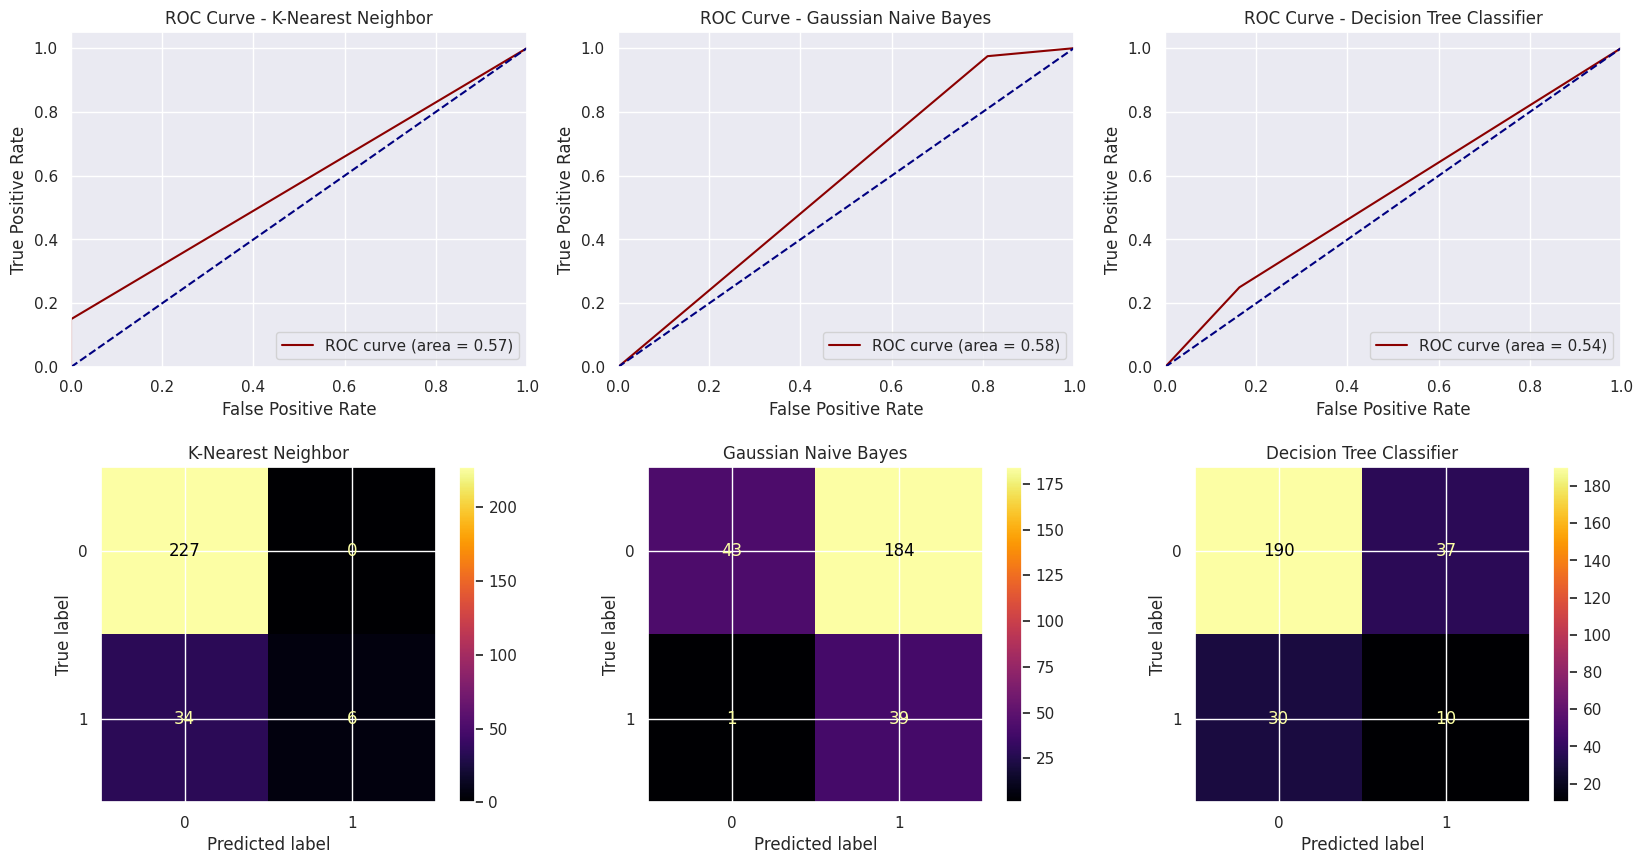

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
K-Nearest Neighbor,87.265918,100.000000,15.000000,57.500000,26.086957
Gaussian Naive Bayes,30.711610,17.488789,97.500000,58.221366,29.657795
Decision Tree Classifier,74.906367,21.276596,25.000000,54.350220,22.988506


In [37]:
# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test_scaled_df)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

##Deployment
Membuat kesimpulan analisis dan menyimpan data hasil klasifikasi ke dalam sebuah file dengan format csv untuk digunakan dalam Looker Studio (Google Data Studio)

In [38]:
df.to_csv('IBM HR Analytics Employee Attrition & Performance - Deployment.csv',index=False)